### Road accident severlty linear regression model 

**Data loading**

In [29]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px 

#Loading data set 
data = pd.read_csv('road-accident-dataset.csv')

data.tail(20)

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
61332,Unvalidated,2.02246E+12,2022,461154159,1,1,1,1,77,11,3,0,0,0,0,0,9,3,7,E01024411
61333,Unvalidated,2.02246E+12,2022,461154159,2,2,1,1,66,10,3,0,0,0,0,0,9,3,6,E01024363
61334,Unvalidated,2.02246E+12,2022,461154818,1,1,1,1,20,4,3,0,0,0,0,0,9,1,3,E01024608
61335,Unvalidated,2.02246E+12,2022,461154926,2,1,1,1,26,6,3,0,0,0,0,0,9,1,2,E01016042
61336,Unvalidated,2.02246E+12,2022,461155054,1,1,1,2,35,6,3,0,0,0,0,0,9,1,5,E01024776
61337,Unvalidated,2.02246E+12,2022,461155076,1,1,1,1,76,11,3,0,0,0,0,0,9,3,6,E01024345
61338,Unvalidated,2.02246E+12,2022,461155125,1,1,3,1,63,9,2,10,1,0,0,0,0,1,3,E01024508
61339,Unvalidated,2.02246E+12,2022,461155125,1,2,3,2,61,9,3,10,1,0,0,0,0,1,3,E01024508
61340,Unvalidated,2.02246E+12,2022,461155961,2,1,1,1,31,6,3,0,0,0,0,0,9,1,4,E01024284
61341,Unvalidated,2.02246E+12,2022,461156018,1,1,3,1,39,7,3,10,9,0,0,0,0,1,3,E01024497


#### Data visualizing

In [30]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

In [31]:
#pie chart to view the sex of casulaties
px.pie(data,data['casualty_severity'], data['sex_of_casualty'],  template='plotly_dark', hole=0.5)

In [32]:
px.histogram(data,data['casualty_severity'],data['vehicle_reference'], color='casualty_severity',  template='plotly_dark')

In [33]:
# Checking for columns with null values 
null_values = data.isnull().sum()
print('Null values in the columns are: \n')
null_values

Null values in the columns are: 



status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [34]:
#Drop the unwanted columns 
data.drop(['status','accident_index','accident_year','accident_reference','casualty_class','sex_of_casualty','age_of_casualty',
           'age_band_of_casualty','pedestrian_location','pedestrian_movement','car_passenger','bus_or_coach_passenger',
           'pedestrian_road_maintenance_worker','casualty_type','casualty_home_area_type','casualty_imd_decile',
           'lsoa_of_casualty'], axis=1, inplace=True)

data.head(20)

,vehicle_reference,casualty_reference,casualty_severity
0,2,1,3
1,1,1,3
2,1,1,3
3,2,3,3
4,3,2,3
5,4,4,3
6,4,5,3
7,4,6,3
8,2,1,2
9,1,1,3


#### Data splitting to x and y 

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [36]:
x_train

,vehicle_reference,casualty_reference
58139,1,1
29135,1,5
22332,1,1
25501,2,1
55225,1,1
...,...,...
12119,2,1
57191,1,1
14147,1,2
56088,2,1


In [37]:
y_train

58139    3
29135    3
22332    3
25501    3
55225    2
        ..
12119    3
57191    3
14147    3
56088    2
38408    3
Name: casualty_severity, Length: 49081, dtype: int64

In [38]:

x=data.drop('casualty_severity', axis=1)
x

,vehicle_reference,casualty_reference
0,2,1
1,1,1
2,1,1
3,2,3
4,3,2
...,...,...
61347,1,1
61348,1,1
61349,2,1
61350,1,1


In [39]:
y = data['casualty_severity']
y

0        3
1        3
2        3
3        3
4        3
        ..
61347    3
61348    2
61349    3
61350    3
61351    3
Name: casualty_severity, Length: 61352, dtype: int64

#### MODEL CREATION


In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)



LinearRegression()

**Applying the model to make a prediction**

In [41]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [42]:
print(y_lr_train_pred, y_lr_test_pred)

[2.77386338 2.82689985 2.77386338 ... 2.78712249 2.78675476 2.77386338] [2.77386338 2.78675476 2.77386338 ... 2.78675476 2.77386338 2.78675476]


**Evaluate model performance** 

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [44]:
print('LR MSE (Train):', lr_train_mse)
print('LR MSE (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR MSE (Test):', lr_test_r2)

LR MSE (Train): 0.1948888645648309
LR MSE (Train): 0.00235108378277038
LR MSE (Test): 0.195891247252318
LR MSE (Test): 0.004585385947126208


In [45]:
lr_results = pd.DataFrame(['LinearRegression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [46]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,0.194889,0.002351,0.195891,0.004585


##### Data visualization of prediction results #####

Text(0.5, 0, 'Experimental logS')

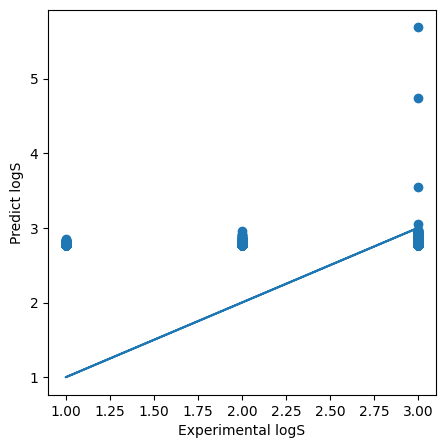

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred )

plt.plot(y_train, y_train,)
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')
